In [4]:
import pulp
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

In [5]:
# Working through the hooks puzzles.
url='https://www.janestreet.com/puzzles/february-2014/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
y =[text for text in soup.body.stripped_strings]
print("Puzzle")
print("~~~~~~")
print(" ".join(y[8:10]))

Puzzle
~~~~~~
In the grid below,  enter nine 9’s in the outermost hook, eight 8’s in the next hook, then seven 7’s, six 6’s, and so on, down to the one 1 (already entered), so that the row and column sums match the values given along the border. Once you’ve completed the puzzle, submit as your answer the sum of the values of the shaded squares (along with any other comments you’d like to provide).


### Puzzle details
<img src="https://www.janestreet.com/puzzles/wp-content/uploads/2014/01/Feb14_Niedermaier.jpg" width="300" >


In [13]:
### solution based on https://github.com/ew398/Jane-Street-Puzzles/blob/master/2014-02-Hooks.py
### preping for the later "Hooks" puzzles by setting up the various hooks and a nice graph

def setup_grid(alignments):
    y = np.array([[1]])
    for i in range(0,8):
        temp = np.ones((i+2,i+2),dtype=int)*(i+2)
        if alignments[i] == 0:         
            temp[:-1,:-1] = y
        if alignments[i] == 1:         
            temp[1:,:-1] = y
        if alignments[i] == 2:         
            temp[:-1,1:] = y
        if alignments[i] == 3:         
            temp[1:,1:] = y                  
        y=temp
    return y
    
def solve_matrix(y,col_labels,row_labels):
    nums = range(1, 10)
    problem = pulp.LpProblem('Problem') 
    x = pulp.LpVariable.dicts('x', [(row, col) for row in nums for col in nums],lowBound=0,upBound=1, cat='Integer') # declare decision variables

    for index in nums:
        mask = (y == index)
        problem += pulp.lpSum([x[(row, col)] * mask[row-1,col-1] for row in range(1, 10) for col in range(1,10)]) == index

    for row in nums:
        problem += pulp.lpSum([y[row-1, col-1] * x[(row, col)] for col in nums]) == col_labels[row - 1]

    for col in nums:
        problem += pulp.lpSum([y[row-1, col-1] * x[(row, col)] for row in nums]) == row_labels[col - 1]

#Solve LP
    problem.solve()

    solution = np.zeros((9,9),dtype=int)
    for row in nums:
        for col in nums:
            solution[row - 1][col - 1] = x[(row, col)].varValue

    return np.array(solution) , y

def sol_print(solved,matrix):
    fig,ax = plt.subplots(1,1,figsize=(4,4))
    x = np.array((solved*matrix).astype('int').astype('str'))
    x[x=="0"] ="-"
    ax = sns.heatmap(matrix,annot=x,cbar=False,cmap="Set3_r",fmt="",linewidths=1)
    ax.axis("off")

Solution took 0.0260 seconds

Sum of checkerboard squares - 158


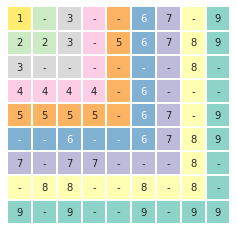

In [14]:
start =  time.perf_counter()

alignments = [0,0,0,0,0,0,0,0]
row_labels = [31, 19, 45, 16, 5, 47, 28, 49, 45]
col_labels = [26, 42, 11, 22, 42, 36, 29, 32, 45]

y = setup_grid(alignments)
solved,matrix = solve_matrix(y,col_labels,row_labels)

stop =  time.perf_counter()
print('Solution took {:0.4f} seconds\n'.format((stop-start)))
sol_print(solved,matrix)

checker = np.ones((9,9),dtype=int)
checker[1::2,::2] = 0
checker[::2,1::2] = 0
print("Sum of checkerboard squares -",np.sum(checker*matrix*solved))



In [15]:
url='https://www.janestreet.com/puzzles/solutions/february-2014-solution/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
x =[text for text in soup.body.stripped_strings]

print("Solution")
print("~~~~~~~~")
print(" ".join(x[7:8]))

Solution
~~~~~~~~
The sum of the shaded squares in the completed grid is 158.   Congratulations to Phil Isenberg for being randomly selected from the dozens of correct submissions to win a Jane Street t-shirt!


### Solution
<img src="https://www.janestreet.com/puzzles/wp-content/uploads/2014/09/Feb14_Solution.png" width="500">


In [22]:
checker = np.ones((9,9),dtype=int)
checker[1::2,::2] = 0
checker[::2,1::2] = 0
np.sum(checker*matrix*solved)

158